In [1]:
import cv2
import os
import glob
import numpy
import pathlib
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print('Loaded haar cascade {}'.format(face_cascade))

def plt_show_bgr(bgr_image):
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.show()

def plt_show_gray(gray_image):
    plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

Loaded haar cascade <CascadeClassifier 0x10b880cb0>


In [16]:
def prepare_images(glob_path, label_info):
    label_info_inv = {v: k for k, v in label_info.items()}
    training_images, training_labels = [], []
    
    for file in glob.glob(glob_path):
        print('reading image {}'.format(file))
        img = cv2.imread(file)

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt_show_gray(img_gray)
        
        img_gray = numpy.asarray(img, numpy.uint8)
        img_name = pathlib.Path(file).name.split('.')[0]
        training_images.append(img_gray)
        training_labels.append(label_info_inv[img_name])

    training_images = numpy.asarray(training_images, numpy.uint8)
    training_labels = numpy.asarray(training_labels, numpy.int32)
    
    return training_images, training_labels

reading image ./img/tv_characters_train/naomi.1.jpg


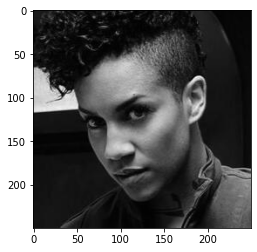

3
reading image ./img/tv_characters_train/naomi.2.jpg


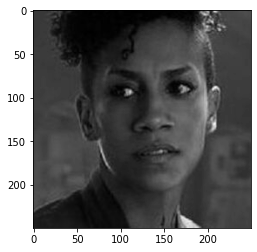

3
reading image ./img/tv_characters_train/amos.1.jpg


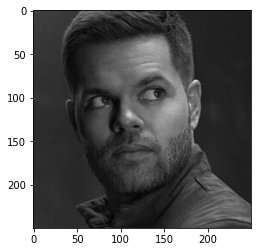

1
reading image ./img/tv_characters_train/alex.1.jpg


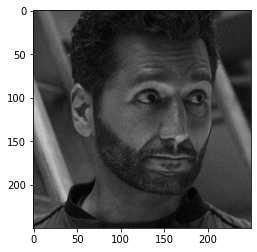

0
reading image ./img/tv_characters_train/alex.2.jpg


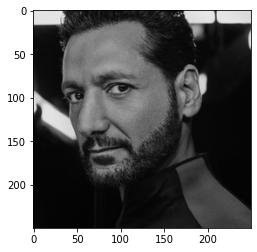

0
reading image ./img/tv_characters_train/james.2.jpg


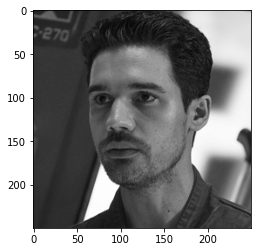

2
reading image ./img/tv_characters_train/james.1.jpg


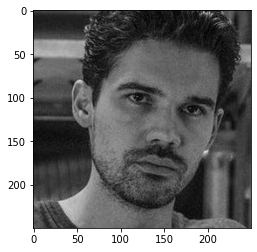

2
model saved


In [17]:
tv_characters_glob = './img/tv_characters_train/*.jpg'
label_info = {0: 'alex', 1: 'amos', 2: 'james', 3: 'naomi'}

model = cv2.face.EigenFaceRecognizer_create()
training_images, training_labels = prepare_images(tv_characters_glob, label_info)
model.train(training_images, training_labels)
for k, v in label_info.items():
    model.setLabelInfo(k, v)
model.save('eigenfaces.model')
print('model saved')